<p style="font-family: Arial; font-size:2.5em;color:green; font-style:bold"><br>
DSCI5240 Model Evaluation
</p><br>

In [7]:
# This code appears in every demonstration Notebook.
# By default, when you run each cell, only the last output of the codes will show.
# This code makes all outputs of a cell show.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Import the libraries and the dataset

In [8]:
import pandas as pd
churn = pd.read_csv('Datasets/TelcoChurn.csv')

1) Display basic information about the dataset.

In [9]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


2). Explore the variable 'churn' with a graph.

<Axes: xlabel='Churn'>

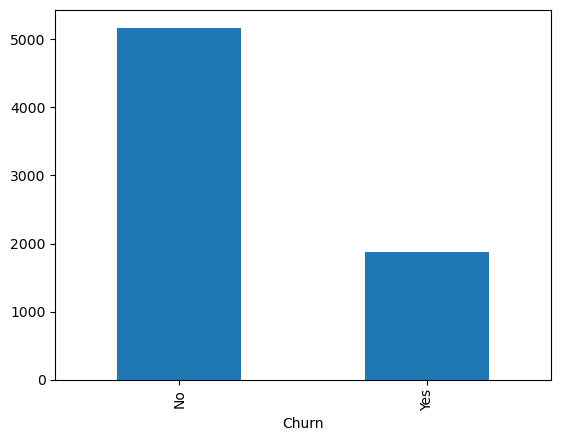

In [10]:
churn['Churn'].value_counts().plot(kind = 'bar')

3). We will run a logistic regression model that predicts 'Churn'. Prepare the data. Hint: consider using patsy as we have done in class practice.

Use the following variables:
'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'MultipleLines', 'InternetService',
      'MonthlyCharges'

In [ ]:
import patsy

y, X = patsy.dmatrices('Churn ~ gender + SeniorCitizen + Partner + Dependents\
                       + tenure + MultipleLines + InternetService + MonthlyCharges + TechSupport + PaperlessBilling + PaymentMethod\
                           + ',
                      data = churn,
                      return_type = 'dataframe')

In [100]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Churn[No]   7043 non-null   float64
 1   Churn[Yes]  7043 non-null   float64
dtypes: float64(2)
memory usage: 165.1 KB


4). Fit the model. Hint: make sure you check y to include the correct dependent variable.

In [101]:
import statsmodels.api as sm
logit_model_1 = sm.Logit(y['Churn[Yes]'], X)
logit_res_1 =  logit_model_1.fit()
logit_res_1.summary()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

5). Make the predictions for probabilities and classify (using 0.5 cut-off).

In [ ]:
# Make predictions for the dataset
predicted_p = logit_res_1.predict(X)

In [ ]:
# Classification
predicted_classes = (predicted_p >= 0.4).astype(int)
predicted_classes[:5]

0    1
1    0
2    0
3    0
4    1
dtype: int64

6). Calculate the accuracy rate.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y['Churn[Yes]'], predicted_classes)
print(accuracy)

0.792559988641204


7) Create the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y['Churn[Yes]'], predicted_classes)
#         # Predicted
        # TN FP
# Actual
        # FN TP

array([[4430,  744],
       [ 717, 1152]])

In [ ]:
tn, fp, fn, tp = confusion_matrix(y['Churn[Yes]'], predicted_classes).ravel()

In [ ]:
# Sensitivity
tp/(tp + fn)
# Specificity
tn/(tn + fp)
# precicion
tp/(tp + fp)

0.6163723916532905

0.8562040974101276

0.6075949367088608

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y['Churn[Yes]'], predicted_classes)
recall_score(y['Churn[Yes]'], predicted_classes)
f1_score(y['Churn[Yes]'], predicted_classes)

0.6075949367088608

0.6163723916532905

0.6119521912350597

In [ ]:
# The proportion of all positives that are correctly classified
sensitivity = 928/(941 + 928)
specificity = 4678/(4678 + 496)
print(sensitivity, specificity)


0.49652220438737293 0.904136064940085


8) Create the ROC curve

<Figure size 640x480 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate - 1-Specificity')

Text(0, 0.5, 'True Positive Rate - Sensitivity')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

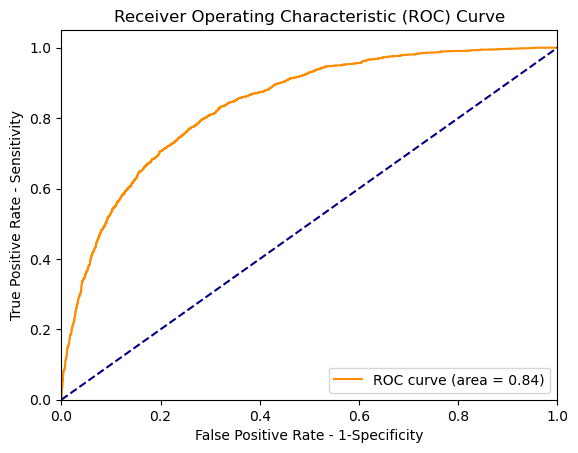

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y['Churn[Yes]'], predicted_p)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate - 1-Specificity')
plt.ylabel('True Positive Rate - Sensitivity')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
